# Coursework: Curves and Surfaces in Visual Computing

### Visual Computing

This notebook contains exercises related to **curves** and **surfaces** in visual computing. The exercises will guide you through implementing various curve representations, Bézier curves, Hermite curves, surface extraction, and subdivision surfaces.

## Grading Scheme (100 points total):

- **Curves Part (50 points):**
    - **Curve Representations**: 10 points
    - **Cubic and Quartic Bézier Curves**: 20 points
    - **Hermite Curves**: 20 points
- **Surfaces Part (50 points):**
    - **Surface Extraction**: 10 points
    - **Marching Cubes Algorithm**: 20 points
    - **Subdivision Surfaces (Catmull-Clark)**: 20 points

### 1. Curve Representations (10 points)
In this task, you will explore two curve representations: parametric, and implicit. Each representation has different use cases.

**Task:**
- Implement code to showcase the differences between the curve representations (parametric, implicit).
- Create use cases for each representation and provide visualization.


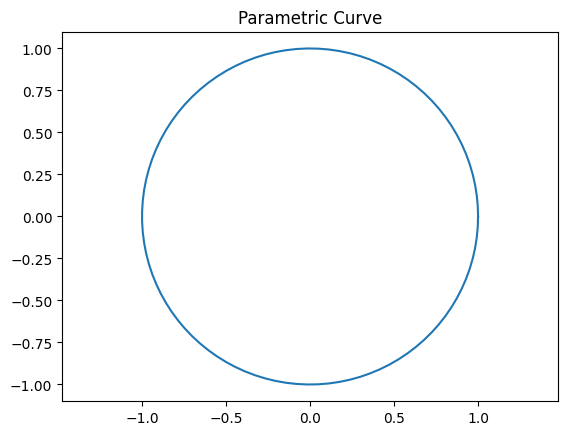

Text(0.5, 1.0, 'Implicit Curve')

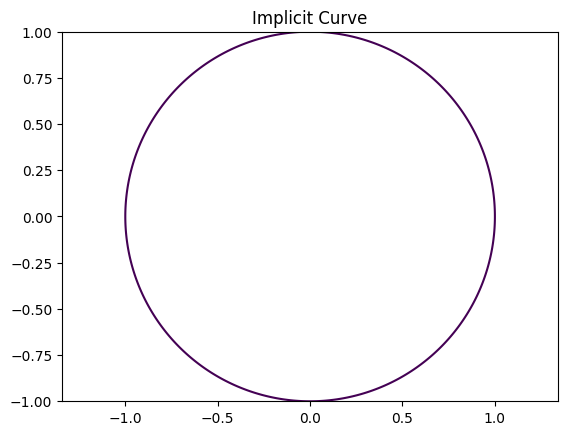

In [82]:
# Code for Curve Representations
import numpy as np
import matplotlib.pyplot as plt

# Define Parametric Curve (e.g., a circle)
t = np.linspace(0, 2*np.pi, 100)
#  Fill in the parametric equations here (x = ..., y = ...)
# Parametric equations for a circle with radius 1
x = np.cos(t)  # x coordinate
y = np.sin(t)  # y coordinate
# Plot Parametric Curve
plt.plot(x, y)
plt.title("Parametric Curve")
plt.axis('equal')  # Ensure equal scaling
plt.show()

# Define Implicit Curve (e.g., circle equation x^2 + y^2 = r^2)
x_implicit = np.linspace(-1, 1, 400)
y_implicit = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x_implicit, y_implicit)
# Placeholder: Fill in the implicit equation here (Z = ...)
# Implicit equation for a circle: x^2 + y^2 = 1
Z = X**2 + Y**2 - 1  # Z=0 defines the circle
# Plot Implicit Curve
plt.contour(X, Y, Z, levels=[0])  
plt.axis('equal')
plt.title("Implicit Curve") 

### 2. Cubic and Quartic Bézier Curves (20 points)
Bézier curves are widely used in computer graphics for modeling smooth curves.

**Task:**
- Implement both cubic and quartic Bézier curves.

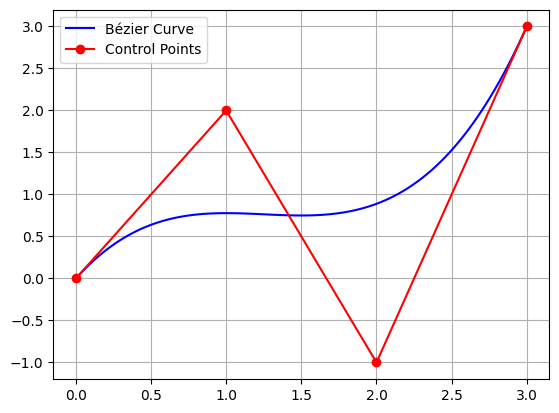

In [83]:
# Code for Bézier Curves
from scipy.special import comb

# Implement the function for Bézier curve calculation
def bezier_curve(points, num_points=100):
    # Get number of control points
    n = len(points) - 1
    # Parameter t
    t = np.linspace(0, 1, num_points)
    
    # Initialize curve points
    curve = np.zeros((num_points, 2))
    
    # Calculate Bézier curve points using the Bernstein polynomial form
    for i in range(n + 1):
        # Calculate Bernstein polynomial value
        bernstein = comb(n, i) * (t ** i) * ((1 - t) ** (n - i))
        # Add contribution of each control point
        curve += np.outer(bernstein, points[i])
    
    return curve


# Example control points

control_points = np.array([[0, 0], [1, 2], [2, -1], [3, 3]])
curve = bezier_curve(control_points)

# Plot Bézier curve and control points
plt.figure()
plt.plot(curve[:, 0], curve[:, 1], 'b-', label='Bézier Curve')
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-', label='Control Points')
plt.grid(True)
plt.legend()
plt.show()


### 3. Hermite Curves (20 points)
Hermite curves are defined by endpoints and tangents at those endpoints.

**Task:**
- Implement Hermite curves and demonstrate their flexibility by adjusting tangents.


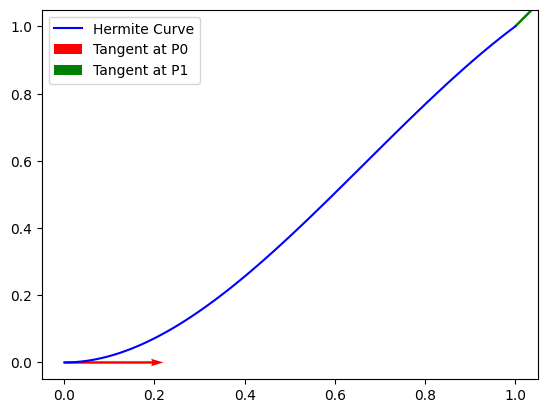

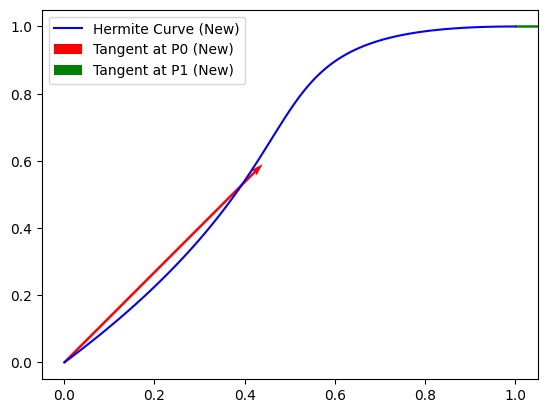

In [84]:
# Code for Hermite Curves
import array


def hermite_curve(P0, P1, T0, T1, num_points=100):
    t = np.linspace(0, 1, num_points)
    # Hermite basis functions (h00, h10, h01, h11)
    h00 = 2*t**3 - 3*t**2 + 1   
    h10 = t**3 - 2*t**2 + t     
    h01 = -2*t**3 + 3*t**2      
    h11 = t**3 - t**2            
    # Fill in Hermite curve using P0, P1, T0, T1
    # Compute curve points using Hermite basis functions and control points/tangents
    curve = np.zeros((num_points, 2))
    for i in range(num_points):
        # Multiply basis functions by control points and tangents
        curve[i] = h00[i]*P0 + h10[i]*T0 + h01[i]*P1 + h11[i]*T1
    return curve

# Example Hermite curve
P0 = np.array([0, 0])
P1 = np.array([1, 1])
T0 = np.array([1, 0])  # Tangent at P0
T1 = np.array([1, 1])  # Tangent at P1

curve = hermite_curve(P0, P1, T0, T1)

# Plot Hermite curve and tangents
plt.figure()
plt.plot(curve[:, 0], curve[:, 1], 'b-', label='Hermite Curve')
plt.quiver(P0[0], P0[1], T0[0], T0[1], color='r', scale=10, label='Tangent at P0')
plt.quiver(P1[0], P1[1], T1[0], T1[1], color='g', scale=10, label='Tangent at P1')
plt.legend()
plt.show()

# New plot with P0, P1, T2, T3
T2 = np.array([2, 2])  # Tangent at P0 for the second curve
T3 = np.array([2, 0])  # Tangent at P1 for the second curve

curve_new = hermite_curve(P0, P1, T2, T3)  # Ensure T2 and T3 are correct

# Plot the new Hermite curve and tangents
plt.figure()
plt.plot(curve_new[:, 0], curve_new[:, 1], 'b-', label='Hermite Curve ')
plt.quiver(P0[0], P0[1], T2[0], T2[1], color='r', scale=10, label='Tangent at P0')
plt.quiver(P1[0], P1[1], T3[0], T3[1], color='g', scale=10, label='Tangent at P1')
plt.legend()
plt.show()






### 4. Surface Extraction (10 points)
Surface extraction involves evaluating a surface function and determining if points lie on the surface.

**Task:**
- Implement a simple function to extract surfaces from a scalar field (such as a sphere).


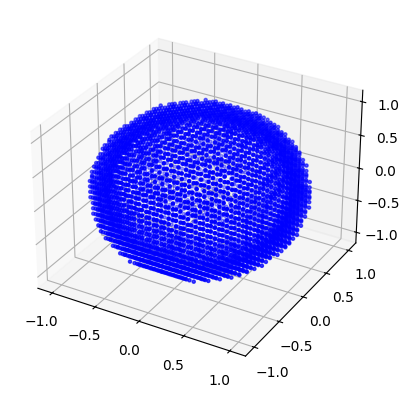

In [85]:
# Code for Surface Extraction
def scalar_field_surface(x, y, z, r=1):
    # Define surface function (e.g., sphere x^2 + y^2 + z^2 = r^2)
    return (x**2 + y**2 + z**2 - r**2)
# Grid evaluation for scalar field
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
z = np.linspace(-2, 2, 50)
X, Y, Z = np.meshgrid(x, y, z)

# Calculate scalar field values
field = scalar_field_surface(X, Y, Z)

# Extract surface by plotting points where scalar field = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface where field is close to 0 (within threshold)
threshold = 0.2
surface_points = np.where(np.abs(field) < threshold)
ax.scatter(X[surface_points], Y[surface_points], Z[surface_points], c='b', marker='.')
plt.show()


### 5. Marching Cubes Algorithm (20 points)
The Marching Cubes algorithm is a popular technique for extracting surfaces from 3D volume data.

**Task:**
- Implement the Marching Cubes algorithm or use a library like `scikit-image` to demonstrate it with a 3D scalar field.
- **Students must fill in the scalar field and use Marching Cubes to extract the surface.**

Volume min: -1.00
Volume max: 11.00


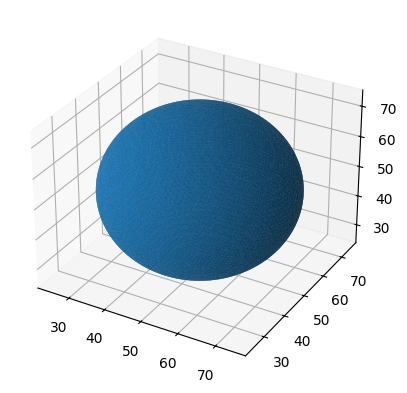

In [86]:
# Code for Marching Cubes Algorithm
from skimage import measure

# Volume data generation (e.g., sphere or another shape)
def volume_data_surface(resolution=100, r=1):
    x = np.linspace(-2, 2, resolution)
    y = np.linspace(-2, 2, resolution)
    z = np.linspace(-2, 2, resolution)
    X, Y, Z = np.meshgrid(x, y, z)
    
    volume = X**2 + Y**2 + Z**2 - r**2
    
    # Let's print the range of values in our volume
    print(f"Volume min: {volume.min():.2f}")
    print(f"Volume max: {volume.max():.2f}")
    
    return measure.marching_cubes(volume, level=0)

# Extract vertices and faces from marching cubes resul
verts, faces, normals, values = volume_data_surface()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface mesh
ax.plot_trisurf(verts[:, 0], verts[:, 1], verts[:, 2], triangles=faces)

plt.show()


### 6. Subdivision Surfaces (Pixar-style) (5 points + bonus 15 points)

Subdivision surfaces are widely used in computer graphics to smooth out meshes by iterative subdivision. This process is heavily utilized in the creation of complex animated characters and detailed objects, like those seen in Pixar movies.

**Task:**
- Implement a basic subdivision surface algorithm (e.g., Catmull-Clark) to smooth a 3D mesh.
- Demonstrate how subdivision surfaces are used in the creation of complex animated characters (like Pixar movies).

In [87]:
""" Catmull-Clark Algorithm by using a prebuilt library"""
import numpy as np
import trimesh

# Use trimesh library to apply subdivisions

# Create vertices for a cube
vertices = np.array([
    [0, 0, 0],  # 0: front bottom left
    [1, 0, 0],  # 1: front bottom right 
    [1, 1, 0],  # 2: front top right
    [0, 1, 0],  # 3: front top left
    [0, 0, 1],  # 4: back bottom left
    [1, 0, 1],  # 5: back bottom right
    [1, 1, 1],  # 6: back top right
    [0, 1, 1]   # 7: back top left
])

# Create faces for a cube (12 triangles)
faces = np.array([
    [0, 1, 2], [0, 2, 3],  # front
    [1, 5, 6], [1, 6, 2],  # right
    [5, 4, 7], [5, 7, 6],  # back
    [4, 0, 3], [4, 3, 7],  # left
    [3, 2, 6], [3, 6, 7],  # top
    [0, 4, 5], [0, 5, 1]   # bottom
])
# Subdivide the mesh using trimesh's subdivide method
vert_faces = trimesh.remesh.subdivide_loop(vertices=vertices,faces=faces,iterations=7)

mesh = trimesh.Trimesh(vert_faces[0],vert_faces[1])
# Display the smoothed mesh
mesh.show()


#### Bonus (15 points)

**Task:**
- Implement Catmull-Clark from scratch.

Dive into how Catmull-Clark subdivision surfaces work and implement the Catmull-Clark algorithm without relying on external libraries like `trimesh`. This algorithm is widely used to smooth out a mesh by iteratively refining the geometry. It generates smoother surfaces by splitting faces, edges, and adding new vertices based on weighted averages of neighboring vertices.

### Steps of the Catmull-Clark Algorithm:

1. **Face Points:**
   - For each face in the mesh, compute the centroid (average of all vertices of the face) and store it as a face point.

2. **Edge Points:**
   - For each edge, compute the average of the midpoints of the edge and the centroids of the two faces adjacent to the edge. This becomes the edge point.

3. **Updated Original Vertex Positions:**
   - For each vertex, update its position as a weighted average of the original vertex, the adjacent face points, and the edge midpoints.

4. **Splitting Faces:**
   - Split each face into smaller faces using the new face points, edge points, and original vertices.

The goal is to generate smoother surfaces after each subdivision iteration, allowing the mesh to be refined and smoothed. This technique is fundamental in character modeling and animation in industries like movie production, including Pixar-style animations.


In [88]:
import numpy as np
import matplotlib.pyplot as plt

class CatmullClark:
    def __init__(self, vertices, faces):
        self.vertices = np.array(vertices)
        self.faces = np.array(faces)

    def subdivide(self):
        new_vertices = list(self.vertices)
        face_points = []
        edge_points = {}

        # Step 1: Compute face points (centroids)
        
        # Step 2: Compute edge points (average of edge midpoints + face points of adjacent faces)
        
                   

        # Step 3: Update original vertex positions
       
            # Compute F (average of face points of adjacent faces)
            
            # Compute R (average of edge points of connected edges)
           
            # Updated vertex position
            

        # Step 4: Split faces into smaller faces
        

    def plot(self):
        """Plot the 3D mesh."""
        
        plt.show()

# Example: Initial cube mesh for Catmull-Clark subdivision
vertices = [[-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
            [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1]]

faces = [[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]]

mesh = CatmullClark(vertices, faces)

# Plot original mesh
print("Original Mesh")
mesh.plot()

# Perform Catmull-Clark subdivision
mesh.subdivide()

# Plot subdivided mesh
print("Subdivided Mesh")
mesh.plot()


Original Mesh
Subdivided Mesh
